In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('ams_LIMPIO.csv')
ams_variables=df[["host_response_rate", "host_acceptance_rate", "host_total_listings_count", "latitude", "accommodates", "bathrooms","minimum_nights","number_of_reviews","bedrooms", "reviews_per_month" , "price"]]
ams_variables.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,accommodates,bathrooms,minimum_nights,number_of_reviews,bedrooms,reviews_per_month,price
0,SIN INFORMACIÓN,SIN INFORMACIÓN,3.0,52.35931,4.0,1.5,4.0,32.0,2.0,0.22,200.0
1,43%,86%,2.0,52.39185,2.9,1.3,2.0,103.0,1.5,0.72,291.6
2,SIN INFORMACIÓN,SIN INFORMACIÓN,3.0,52.35871,2.0,1.0,3.0,6.0,1.0,0.04,155.0
3,SIN INFORMACIÓN,SIN INFORMACIÓN,3.0,52.35972,2.0,1.3,3.0,36.0,1.0,0.29,291.6
4,100%,88%,1.0,52.37104,2.0,1.3,5.0,93.0,1.0,0.63,291.6


In [4]:
ams_variables['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%', ''), errors='coerce')
ams_variables['host_response_rate'] = ams_variables['host_response_rate'] / 100

ams_variables['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'].str.replace('%', ''), errors='coerce')
ams_variables['host_acceptance_rate'] = ams_variables['host_acceptance_rate'] / 100

ams_variables['host_total_listings_count'] = pd.to_numeric(ams_variables['host_total_listings_count'], errors='coerce')
ams_variables['accommodates'] = pd.to_numeric(ams_variables['accommodates'], errors='coerce')
ams_variables['price'] = pd.to_numeric(ams_variables['price'], errors='coerce')
ams_variables['bathrooms'] = pd.to_numeric(ams_variables['bathrooms'], errors='coerce')
ams_variables['minimum_nights'] = pd.to_numeric(ams_variables['minimum_nights'], errors='coerce')
ams_variables['bedrooms'] = pd.to_numeric(ams_variables['bedrooms'], errors='coerce')
ams_variables['latitude'] = pd.to_numeric(ams_variables['latitude'], errors='coerce')


ams_variables["host_response_rate"] = ams_variables["host_response_rate"].fillna(round(ams_variables["host_response_rate"].mean(), 1))
ams_variables["host_acceptance_rate"] = ams_variables["host_acceptance_rate"].fillna(round(ams_variables["host_acceptance_rate"].mean(), 1))
ams_variables["host_total_listings_count"] = ams_variables["host_total_listings_count"].fillna(round(ams_variables["host_total_listings_count"].mean(), 1))
ams_variables["accommodates"] = ams_variables["accommodates"].fillna(round(ams_variables["accommodates"].mean(), 1))
ams_variables["reviews_per_month"] = ams_variables["reviews_per_month"].fillna(round(ams_variables["reviews_per_month"].mean(), 1))
ams_variables["price"] = ams_variables["price"].fillna(round(ams_variables["price"].mean(), 1))
ams_variables["bathrooms"] = ams_variables["bathrooms"].fillna(round(ams_variables["bathrooms"].mean(), 1))
ams_variables["minimum_nights"] = ams_variables["minimum_nights"].fillna(round(ams_variables["minimum_nights"].mean(), 1))
ams_variables["bedrooms"] = ams_variables["bedrooms"].fillna(round(ams_variables["bedrooms"].mean(), 1))
ams_variables["number_of_reviews"] = ams_variables["number_of_reviews"].fillna(round(ams_variables["number_of_reviews"].mean(), 1))
ams_variables["latitude"] = ams_variables["latitude"].fillna(round(ams_variables["latitude"].mean(), 1))



C:\Users\Max\AppData\Local\Temp\ipykernel_4292\2744039504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ams_variables['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.replace('%', ''), errors='coerce')
C:\Users\Max\AppData\Local\Temp\ipykernel_4292\2744039504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ams_variables['host_response_rate'] = ams_variables['host_response_rate'] / 100
C:\Users\Max\AppData\Local\Temp\ipykernel_4292\2744039504.py:4: SettingWithCopyWarning: 
A value

In [5]:
ams_variables.isnull().sum()

host_response_rate           0
host_acceptance_rate         0
host_total_listings_count    0
latitude                     0
accommodates                 0
bathrooms                    0
minimum_nights               0
number_of_reviews            0
bedrooms                     0
reviews_per_month            0
price                        0
dtype: int64

c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Max\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_in

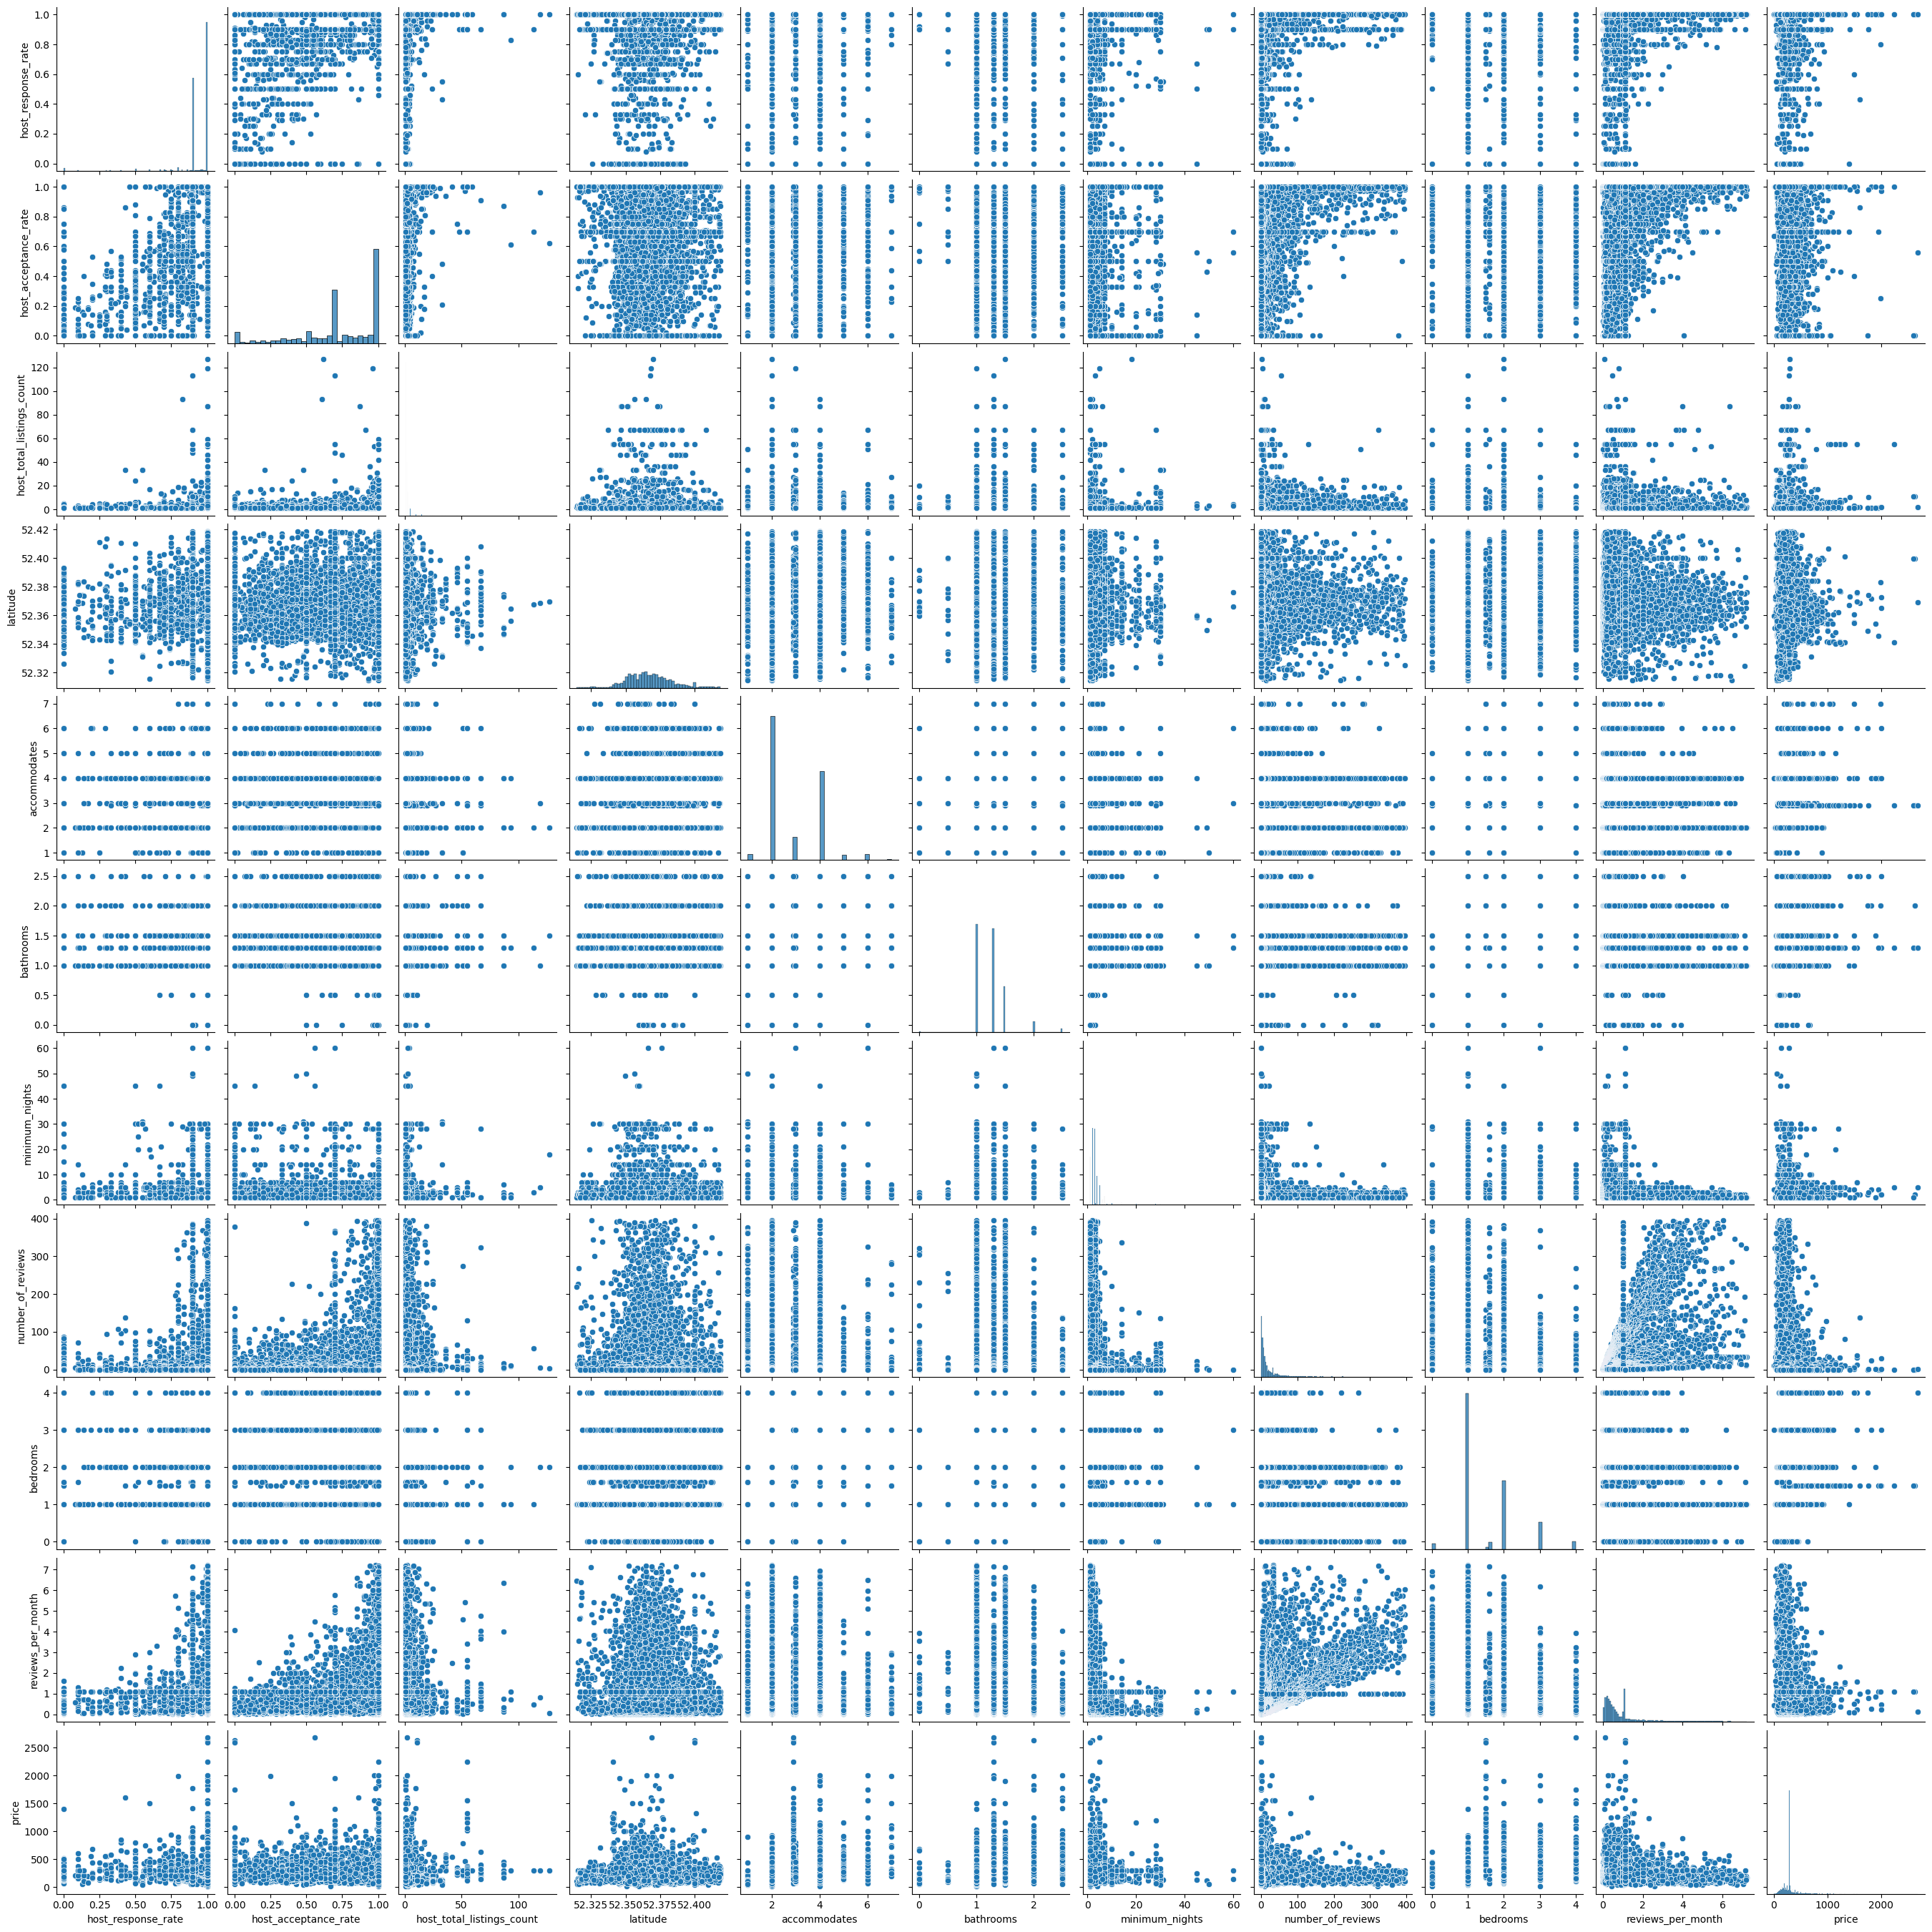

In [6]:
sns.pairplot(ams_variables)

            y = ax^2 + bx + c   ("Función cuadrática")

            y = a*exp(bx) + c   ("Función exponencial")

            y = 1/a*x           ("Función inversa")

            y = a*np.sin(x) + b ("Función senoidal")

            y = a*np.tan(x) + b ("Función tangencial")

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

            y = a*np.log(x) + b  (Función logaritmica)

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

            y = 1/a*x**2  (Función cuadrática inversa)

            y = a/b*x**2 + c*x (Función polinomial inversa)
          

MODELOS host_response_rate

In [7]:
#Declarar variables dependientes e independientes
Vars_Indep=ams_variables[["price"]]
Var_Dep=ams_variables[["host_response_rate"]]
x= Vars_Indep
y= Var_Dep

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

     def  func1 (x, a, b, c):
          return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, ams_variables['price'], ams_variables['host_response_rate'])
parametros, _ = curve_fit(func1, ams_variables['price'], ams_variables['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]

yfit1 = (a*x**2 + b)/ c*x
R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

0.630270650983631

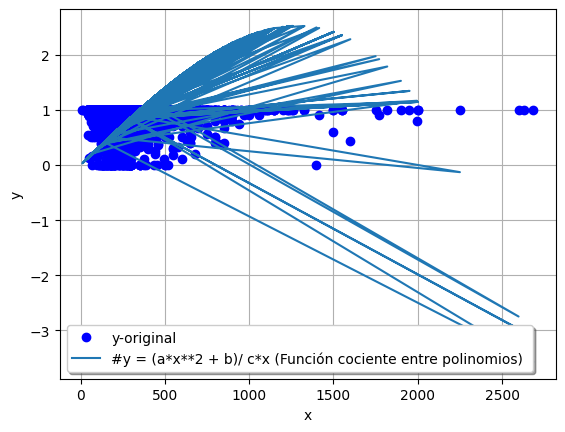

In [8]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios) ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

    MODELOS host_acceptance_rate

In [9]:
Vars_Indep=ams_variables[["price"]]
Var_Dep=ams_variables[["host_acceptance_rate"]]
x= Vars_Indep
y= Var_Dep

#y = a/b*x**2 + c*x (Función polinomial inversa)

def  func2 (x, a, b, c):
     return a/b*x**2 + c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func2, ams_variables['price'], ams_variables['host_acceptance_rate'])

parametros, _ = curve_fit(func2, ams_variables['price'], ams_variables['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]

yfit2 = a/b*x**2 + c*x

R2 = r2_score(yfit2, y)
R2=abs(R2)
np.sqrt(R2)

1.4145024332183096

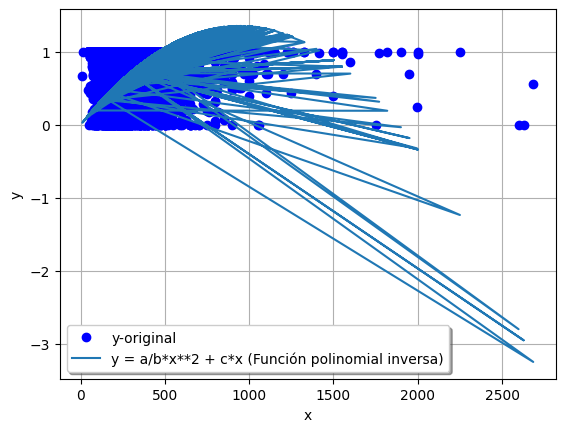

In [10]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="y = a/b*x**2 + c*x (Función polinomial inversa)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

MODELOS host_total_listings_count

In [11]:
#Declarar variables dependientes e independientes
Vars_Indep=ams_variables[["bathrooms"]]
Var_Dep=ams_variables[["host_total_listings_count"]]
x= Vars_Indep
y= Var_Dep

 #y = 1/a*x**2  (Función cuadrática inversa)
#y = a/b*x**2 + c*x (Función polinomial inversa)

def func1 (x, a, b, c):
     return (a*x**130 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, ams_variables['bathrooms'], ams_variables['host_total_listings_count'])

parametros, _ = curve_fit(func1, ams_variables['bathrooms'], ams_variables['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 =  (a*x**130 + b)/ c*x

R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

11.672817347587605

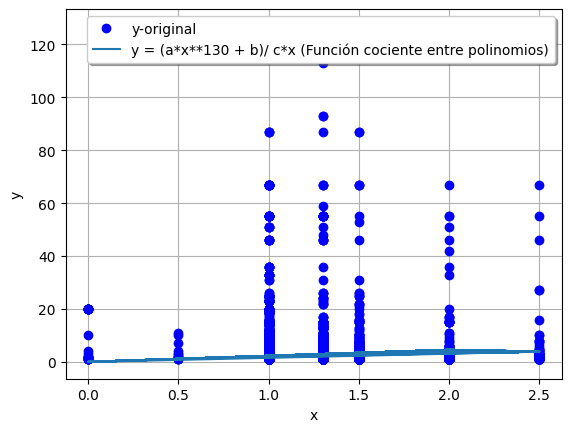

In [12]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**130 + b)/ c*x (Función cociente entre polinomios)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

MODELOS accommodates

In [14]:
#Declarar variables dependientes e independientes
Vars_Indep=ams_variables[["price"]]
Var_Dep=ams_variables[["accommodates"]]
x= Vars_Indep
y= Var_Dep

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, ams_variables['price'], ams_variables['accommodates'])

parametros, _ = curve_fit(func1, ams_variables['price'], ams_variables['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**2 + b)/ c*x

R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

0.580188982117416

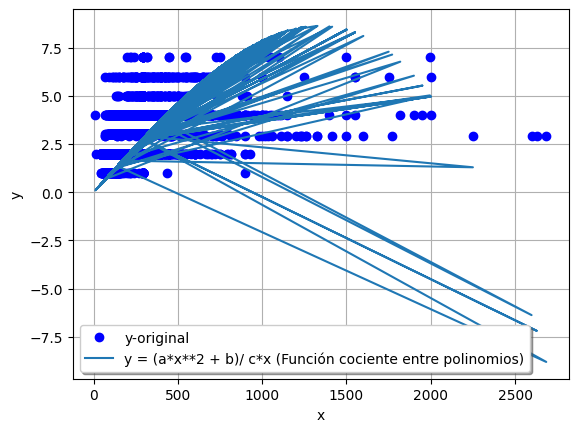

In [15]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

MODELOS reviews_per_month

In [16]:
#Declarar variables dependientes e independientes
Vars_Indep=ams_variables[["bathrooms"]]
Var_Dep=ams_variables[["reviews_per_month"]]
x= Vars_Indep
y= Var_Dep

#y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)
def  func1 (x, a, b, c):
     return (a*x**100 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, ams_variables['bathrooms'], ams_variables['reviews_per_month'])

parametros, _ = curve_fit(func1, ams_variables['bathrooms'], ams_variables['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**100 + b)/ c*x

R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

6.517420457235894

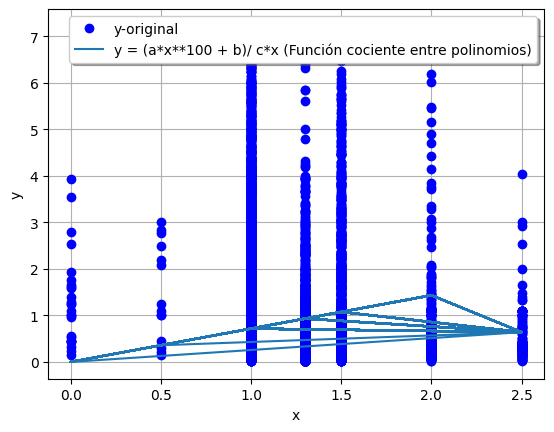

In [17]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**100 + b)/ c*x (Función cociente entre polinomios)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

 MODELOS price

In [18]:
#Declarar variables dependientes e independientes
Vars_Indep=ams_variables[["bedrooms"]]
Var_Dep=ams_variables[["price"]]
x= Vars_Indep
y= Var_Dep

   # y = 1/a*x**2  (Función cuadrática inversa)
def  func1 (x, a, b, c):
     return 1/a*x**2

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, ams_variables['bedrooms'], ams_variables['price'])

parametros, _ = curve_fit(func1, ams_variables['bedrooms'], ams_variables['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = 1/a*x**2

R2 = r2_score(yfit1, y)
R2=abs(R2)
np.sqrt(R2)

C:\Users\Max\AppData\Local\Temp\ipykernel_4292\895062871.py:12: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, ams_variables['bedrooms'], ams_variables['price'])
C:\Users\Max\AppData\Local\Temp\ipykernel_4292\895062871.py:14: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, ams_variables['bedrooms'], ams_variables['price'])


0.9489108850493797

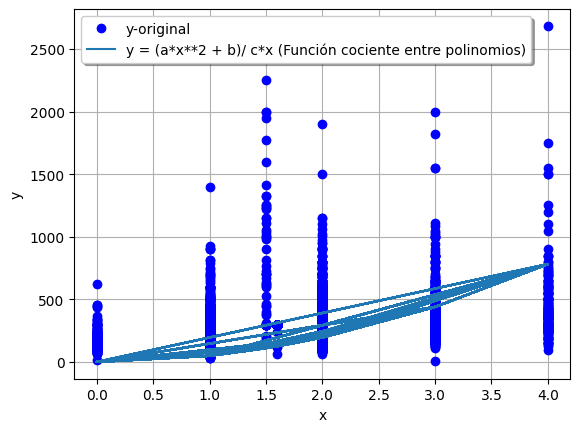

In [19]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()